In [ ]:
!pip install keras-ocr

In [ ]:
import keras_ocr
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
# download pre trained weights both for detector and recognizer
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
img_path = '/content/drive/MyDrive/ktp/ktp3.png'

In [ ]:
images = [keras_ocr.tools.read(img_path)]

print(np.shape(images))

(1, 636, 1004, 3)


In [ ]:
# saat direcognize seperti di bawah, images hrs di dalam list
# atau sdh berbentuk list seperti komen di cell atas

results = pipeline.recognize(images)
pd.DataFrame(results[0], columns=['text', 'bbox'])

2/2 [==============================] - 15s 4s/step


,text,bbox
0,provinsi,"[[352.0, 32.0], [511.0, 32.0], [511.0, 61.0], ..."
1,sulawesi,"[[519.0, 32.0], [695.0, 32.0], [695.0, 61.0], ..."
2,utara,"[[704.0, 32.0], [815.0, 32.0], [815.0, 61.0], ..."
3,selatan,"[[706.0, 66.0], [860.0, 66.0], [860.0, 95.0], ..."
4,kabupaten,"[[307.0, 67.0], [509.0, 67.0], [509.0, 95.0], ..."
5,minahasa,"[[520.0, 67.0], [697.0, 67.0], [697.0, 95.0], ..."
6,nik,"[[26.0, 122.0], [94.999985, 122.0], [94.999985..."
7,tlosoneoseoo,"[[232.0, 122.0], [705.0, 122.0], [705.0, 160.0..."
8,jelty,"[[243.71661, 178.84708], [319.9037, 177.51047]..."
9,jeine,"[[331.0, 178.0], [404.0, 178.0], [404.0, 201.0..."


<Axes: >

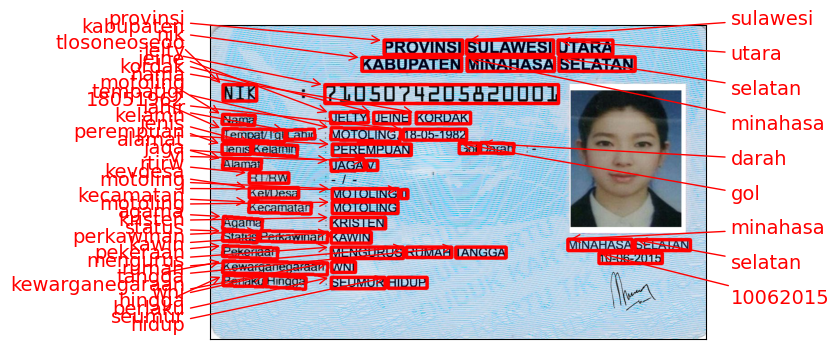

In [ ]:
keras_ocr.tools.drawAnnotations(images[0], results[0])

In [ ]:
# mencari index text 'nik'
df = pd.DataFrame(results[0], columns=['text', 'bbox'])
indices = len(df.index)
index = 0

for x in range(0, indices):
  if df.loc[x, 'text'] != 'nik':
    index += 1
  if df.loc[x, 'text'] == 'nik':
    break

In [ ]:
# index text 'nomor nik'
index_no_nik = index + 1

# titik koordinat bounding box 'nomor nik'
bbox_coordinate = df.loc[index_no_nik, 'bbox']

In [ ]:
img = cv2.imread(img_path)
rows, cols, _ = img.shape
print("Rows (height): ", rows)
print("Cols (width): ", cols)


Rows (height):  636
Cols (width):  1004


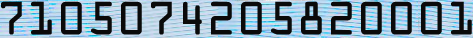

In [ ]:
# ROI (region of interest)
# tapi ga pake kotak ijo

x1 = int(bbox_coordinate[0][0])
y1 = int(bbox_coordinate[0][1])
x2 = int(bbox_coordinate[2][0])
y2 = int(bbox_coordinate[2][1])

roi = img[y1: y2, x1: x2]
cv2_imshow(roi)

In [ ]:
cv2.imwrite('/content/drive/MyDrive/ktp_edited/NIK.png', roi)

True

In [ ]:
# kotak ijo

# cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)